## Introduction:

This project focuses on decomposing an audio recording into its fundamental frequencies. We aim to explore how audio signals can be both disassembled and reassembled using these frequency components. Every audio piece can be described as a mathematical function, which can be expressed as a linear combination of sine and cosine functions. We will approach each function as being spanned by functions of sine and cosine, represented by an infinite-dimensional basis.

## Fourier Analysis:

\begin{array}{l}

\text{In this notebook, we will approximate a function \( f(x) \) using a Fourier series expansion.\\\\
The Fourier series representation decomposes \( f(x) \) into a series of cosine and sine functions at different frequencies \( k \).}\\\\

\text{The Fourier series for a function \( f(x) \) is given by:}\\\\

f(x) \approx \frac{A_0}{2} + \sum_{k=1}^{\infty} \left(A_k \cos(kx) + B_k \sin(kx)\right)\\\\

\text{where \( A_k \) and \( B_k \) are the Fourier coefficients, representing the amplitude of the cosine and sine terms at each frequency \( k \). \\\\
These coefficients are determined by projecting \( f(x) \) onto the cosine and sine basis functions.}

\end{array}


Given a function f(x) we would like to approximate it using the fourier analysis. 
As an example we will first define a function f(x):

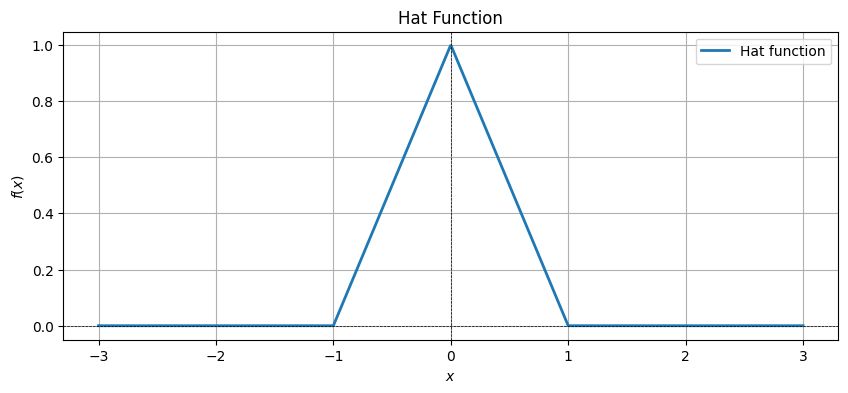

In [204]:
import numpy as np
import matplotlib.pyplot as plt

# Define the hat function
def hat_function(x):
    return np.where(np.abs(x) <= 1, 1 - np.abs(x), 0)
    
# Define x values
x_values = np.linspace(-3, 3, 1000)  # Extend beyond the domain for clarity

# Plot the hat function
plt.figure(figsize=(10, 4))
plt.plot(x_values, hat_function(x_values), label="Hat function", linewidth=2)
plt.title("Hat Function")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--') 
plt.axvline(0, color='black', linewidth=0.5, linestyle='--') 
plt.grid(True)
plt.legend()
plt.show()


Then, we will show how this approximation works for 5 different frequencies. 
As the ammount of frequencies examined is larger, we will obtain a better approximation:

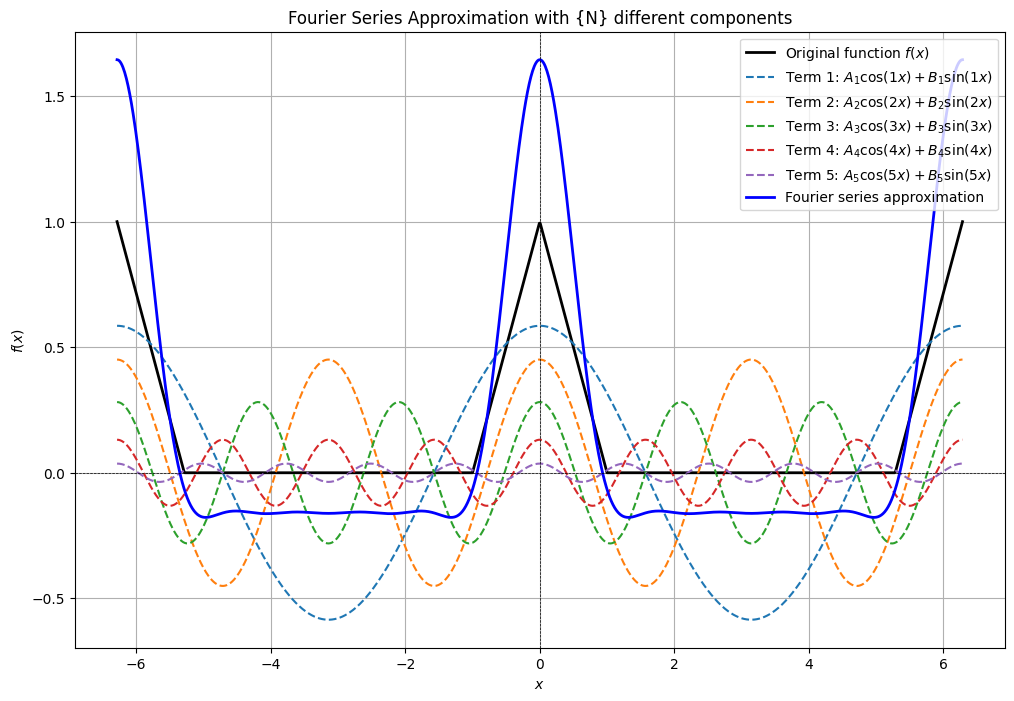

In [205]:
from scipy.integrate import trapezoid
import numpy as np
import matplotlib.pyplot as plt

# Define the periodic extension of the hat function
def f(x):
    # Make x periodic with period 2*pi
    x = np.mod(x + np.pi, 2 * np.pi) - np.pi
    return np.where(np.abs(x) <= 1, 1 - np.abs(x), 0)

# Fourier series parameters
N = 5  # Number of terms in the Fourier series (keep small to visualize individual waves)
x_values = np.linspace(-2 * np.pi, 2 * np.pi, 1000)  # Extended range for visualization

# Calculate the Fourier coefficients
def compute_coefficients(N):
    A0 = (1 / (2 * np.pi)) * trapezoid(f(x_values), x_values)  # A0 coefficient
    A_k = []
    B_k = []

    for k in range(1, N + 1):
        # Compute Ak
        cos_terms = f(x_values) * np.cos(k * x_values)
        Ak = (1 / np.pi) * trapezoid(cos_terms, x_values)
        A_k.append(Ak)

        # Compute Bk
        sin_terms = f(x_values) * np.sin(k * x_values)
        Bk = (1 / np.pi) * np.trapezoid(sin_terms, x_values)
        B_k.append(Bk)

    return A0, np.array(A_k), np.array(B_k)

# Reconstruct the Fourier series
def fourier_series(x, A0, A_k, B_k):
    result = A0 / 2  # Start with the A0 term
    terms = [A0 / 2]  # List to store individual terms
    for k in range(1, len(A_k) + 1):
        term = A_k[k - 1] * np.cos(k * x) + B_k[k - 1] * np.sin(k * x)
        result += term
        terms.append(term)
    return result, terms

# Compute coefficients and reconstruct the Fourier series
A0, A_k, B_k = compute_coefficients(N)
f_approx, terms = fourier_series(x_values, A0, A_k, B_k)

# Plot the original function, full approximation, and individual terms
plt.figure(figsize=(12, 8))

# Original function
plt.plot(x_values, f(x_values), label="Original function $f(x)$", linewidth=2, color="black")

# Individual cosine and sine waves
for k in range(1, len(terms)):
    plt.plot(x_values, terms[k], label=f"Term {k}: $A_{k} \\cos({k}x) + B_{k} \\sin({k}x)$", linestyle="--")

# Full Fourier approximation
plt.plot(x_values, f_approx, label="Fourier series approximation", linewidth=2, color="blue")

# Styling the plot
plt.title("Fourier Series Approximation with {N} different components")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  
plt.axvline(0, color='black', linewidth=0.5, linestyle='--') 
plt.grid(True)
plt.legend()
plt.show()



\begin{array}{l}
\textbf{Calculation of Fourier Coefficients:} \\\\

\text{The coefficients \( A_k \) and \( B_k \) are calculated by taking the inner product of \( f(x) \) with the cosine and sine basis functions.\\\\
This projection extracts the contribution of each frequency component.} \\\\

\text{The inner product of two functions \( f \) and \( g \) over an interval \([a, b]\) is defined as:} \\\\

\langle f, g \rangle = \int_{a}^{b} f(x) g(x) \, dx \\\\

\text{To obtain \( A_k \) and \( B_k \), we take the inner products:} \\\\

A_k = \frac{\langle f, \cos(kx) \rangle}{||\cos(kx)||^2}, \quad B_k = \frac{\langle f, \sin(kx) \rangle}{||\sin(kx)||^2} \\\\

\text{where \( ||g||^2 = \langle g, g \rangle \) is the norm squared of the basis function. \\\\
This normalization ensures each coefficient accurately represents the component of \( f(x) \) in that basis direction.} \\\\

\textbf{Fourier Coefficients on } [-\pi, \pi]: \\\\

\text{To compute the Fourier coefficients, we normalize the inner product by dividing by the interval length \( 2\pi \). \\\\
For \( A_k \) and \( B_k \), we use:} \\\\

A_k = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos(kx) \, dx, \quad 
B_k = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin(kx) \, dx. \\\\

\text{The normalization factor \( \frac{1}{\pi} \) accounts for the interval length \( 2\pi \), as the integral itself spans this length. \\\\
The norm squared of the basis functions \( \cos(kx) \) and \( \sin(kx) \) over \([- \pi, \pi]\) is given by:} \\\\

||\cos(kx)||^2 = \langle \cos(kx), \cos(kx) \rangle = \int_{-\pi}^\pi \cos^2(kx) \, dx = \pi, \\\\
||\sin(kx)||^2 = \langle \sin(kx), \sin(kx) \rangle = \int_{-\pi}^\pi \sin^2(kx) \, dx = \pi. \\\\

\text{When dividing \( \langle f, \cos(kx) \rangle \) by \( ||\cos(kx)||^2 \), the coefficient \( A_k \) becomes:} \\\\

A_k = \frac{1}{\pi} \int_{-\pi}^\pi f(x) \cos(kx) \, dx. \\\\

\text{Similarly, \( B_k \) is normalized as:} \\\\

B_k = \frac{1}{\pi} \int_{-\pi}^\pi f(x) \sin(kx) \, dx. \\\\


\end{array}


$$
\begin{array}{l}
\text{With the Fourier coefficients \( A_k \) and \( B_k \) calculated, we can construct the Fourier series approximation of \( f(x) \) by summing the terms:} \\\\

f(x) \approx \frac{A_0}{2} + \sum_{k=1}^{N} \left(A_k \cos(kx) + B_k \sin(kx)\right) \\\\

\text{We will now plot both the original function and its Fourier series approximation.}
\end{array}
$$


\begin{array}{l}
\textbf{Transforming to } [0, L]: \\\\

\text{For a general interval } [0, L], \text{ we redefine the Fourier series:} \\\\

f(x) \approx \frac{A_0}{2} + \sum_{k=1}^\infty \left( A_k \cos\left(\frac{2\pi k x}{L}\right) + B_k \sin\left(\frac{2\pi k x}{L}\right) \right). \\\\

\textbf{Fourier Coefficients on } [0, L]: \\\\

A_0 = \frac{2}{L} \int_0^L f(x) \, dx, \\\\
A_k = \frac{2}{L} \int_0^L f(x) \cos\left(\frac{2\pi k x}{L}\right) \, dx, \\\\
B_k = \frac{2}{L} \int_0^L f(x) \sin\left(\frac{2\pi k x}{L}\right) \, dx. \\\\

\text{The factor } \frac{2}{L} \text{ normalizes the interval length } L, \text{ replacing } \frac{1}{\pi} \text{ for } [-\pi, \pi]. \\\\
\text{The arguments of } \cos \text{ and } \sin, \text{ scaled by } \frac{2\pi}{L}, \text{ reflect the interval's length.}
\end{array}


\begin{array}{l}

\textbf{Matrix Representation of Basis Functions:} \\\\
\text{The cosine and sine basis functions are represented as separate matrices:} \\\\

G_{\cos} = \begin{bmatrix}
\cos(x_1) & \cos(2x_1) & \dots & \cos(Nx_1) \\
\cos(x_2) & \cos(2x_2) & \dots & \cos(Nx_2) \\
\vdots & \vdots & & \vdots \\
\cos(x_M) & \cos(2x_M) & \dots & \cos(Nx_M)
\end{bmatrix}, \quad
G_{\sin} = \begin{bmatrix}
\sin(x_1) & \sin(2x_1) & \dots & \sin(Nx_1) \\
\sin(x_2) & \sin(2x_2) & \dots & \sin(Nx_2) \\
\vdots & \vdots & & \vdots \\
\sin(x_M) & \sin(2x_M) & \dots & \sin(Nx_M)
\end{bmatrix}. \\\\



\text{Here, \( M \) is the number of sample points, and \( N \) is the number of frequencies used. The size of each matrix is \( M \times N \).} \\\\

\textbf{Fourier Coefficients:} \\\\
\text{The Fourier coefficients are computed using the inner product in matrix form:} \\\\
\mathbf{A} = \frac{1}{\pi} G_{\cos}^\top \mathbf{f}, \quad \mathbf{B} = \frac{1}{\pi} G_{\sin}^\top \mathbf{f}, \\\\
\text{where \( \mathbf{A} = [A_1, A_2, \dots, A_N]^\top \) and \( \mathbf{B} = [B_1, B_2, \dots, B_N]^\top \) are the cosine and sine coefficients, respectively.} \\\\

\text{The vector \( \mathbf{f} = [f(x_1), f(x_2), \dots, f(x_M)]^\top \) represents the sampled function values.} \\\\

\textbf{Constant Term \( A_0 \):} \\\\
\text{The constant term \( A_0 \) is computed separately as the average value of \( f(x) \):} \\\\
A_0 = \frac{1}{\pi} \mathbf{f}^\top \mathbf{1}, \quad \text{where \( \mathbf{1} \) is a vector of ones of size \( M \).} \\\\

\textbf{Tensor Representation:} \\\\
\text{The inner product calculation can also be expressed as a tensor contraction:} \\\\
c_{jk} = \sum_i G_{ij} f_i, \\\\
\text{where \( G \) acts as a rank-2 tensor (basis matrix), and \( \mathbf{f} \) is a rank-1 tensor (function values).} \\\\

\end{array}




\begin{array}{l}
\textbf{For the Interval [0, L]\textbf{):} \\\\

\text{The Fourier series approximates a function \( f(x) \) as:} \\\\
f(x) \approx \frac{A_0}{2} + \sum_{k=1}^N \left( A_k \cos\left(\frac{2\pi k x}{L}\right) + B_k \sin\left(\frac{2\pi k x}{L}\right) \right). \\\\\\\\

G_{\cos} = \begin{bmatrix}
\cos\left(\frac{2\pi x_1}{L}\right) & \cos\left(\frac{4\pi x_1}{L}\right) & \dots & \cos\left(\frac{2\pi N x_1}{L}\right) \\
\cos\left(\frac{2\pi x_2}{L}\right) & \cos\left(\frac{4\pi x_2}{L}\right) & \dots & \cos\left(\frac{2\pi N x_2}{L}\right) \\
\vdots & \vdots & & \vdots \\
\cos\left(\frac{2\pi x_M}{L}\right) & \cos\left(\frac{4\pi x_M}{L}\right) & \dots & \cos\left(\frac{2\pi N x_M}{L}\right)
\end{bmatrix}, \quad

G_{\sin} = \begin{bmatrix}
\sin\left(\frac{2\pi x_1}{L}\right) & \sin\left(\frac{4\pi x_1}{L}\right) & \dots & \sin\left(\frac{2\pi N x_1}{L}\right) \\
\sin\left(\frac{2\pi x_2}{L}\right) & \sin\left(\frac{4\pi x_2}{L}\right) & \dots & \sin\left(\frac{2\pi N x_2}{L}\right) \\
\vdots & \vdots & & \vdots \\
\sin\left(\frac{2\pi x_M}{L}\right) & \sin\left(\frac{4\pi x_M}{L}\right) & \dots & \sin\left(\frac{2\pi N x_M}{L}\right)
\end{bmatrix}. \\\\



\end{array}


In [206]:
import pandas as pd


# Define the hat function
def hat_function(x):
    """
    A hat function defined as:
    - Linear increase from 0 to 5
    - Linear decrease from 5 to 10
    interval is: [0,10]
    """
    return np.where(x <= 5, x, 10 - x)

# Parameters
L = 10  # Interval length
N = 10   # Number of Fourier coefficients
M = 100  # Number of sample points

# Generate sample points in the interval [0, L]
x = np.linspace(0, L, M)
y = hat_function(x)

# Compute G_cos and G_sin matrices
G_cos = np.array([[np.cos(2 * np.pi * k * xi / L) for k in range(1, N + 1)] for xi in x])
G_sin = np.array([[np.sin(2 * np.pi * k * xi / L) for k in range(1, N + 1)] for xi in x])

# Fourier coefficient approximations
A = np.dot(G_cos.T, y) * (2 / M)  # Cosine coefficients
B = np.dot(G_sin.T, y) * (2 / M)  # Sine coefficients
A_0 = np.sum(y) * (2 / M)         # Constant term

# Convert matrices to Pandas DataFrames for better readability
G_cos_df = pd.DataFrame(G_cos, columns=[f"cos(2πk={k})" for k in range(1, N + 1)])
G_sin_df = pd.DataFrame(G_sin, columns=[f"sin(2πk={k})" for k in range(1, N + 1)])


In [207]:
# Print the matrices and coefficients
print("G_cos Matrix:")
print(G_cos_df)

G_cos Matrix:
    cos(2πk=1)  cos(2πk=2)  cos(2πk=3)  cos(2πk=4)  cos(2πk=5)  cos(2πk=6)  \
0     1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
1     0.997987    0.991955    0.981929    0.967949    0.950071    0.928368   
2     0.991955    0.967949    0.928368    0.873849    0.805270    0.723734   
3     0.981929    0.928368    0.841254    0.723734    0.580057    0.415415   
4     0.967949    0.873849    0.723734    0.527225    0.296920    0.047582   
..         ...         ...         ...         ...         ...         ...   
95    0.967949    0.873849    0.723734    0.527225    0.296920    0.047582   
96    0.981929    0.928368    0.841254    0.723734    0.580057    0.415415   
97    0.991955    0.967949    0.928368    0.873849    0.805270    0.723734   
98    0.997987    0.991955    0.981929    0.967949    0.950071    0.928368   
99    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

    cos(2πk=7)  cos(2πk=8)  cos(2πk=9)  cos(2πk=1

In [208]:
print("\nG_sin Matrix:")
print(G_sin_df)


G_sin Matrix:
      sin(2πk=1)    sin(2πk=2)    sin(2πk=3)    sin(2πk=4)    sin(2πk=5)  \
0   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1   6.342392e-02  1.265925e-01  1.892512e-01  2.511480e-01  3.120334e-01   
2   1.265925e-01  2.511480e-01  3.716625e-01  4.861967e-01  5.929079e-01   
3   1.892512e-01  3.716625e-01  5.406408e-01  6.900790e-01  8.145760e-01   
4   2.511480e-01  4.861967e-01  6.900790e-01  8.497254e-01  9.549022e-01   
..           ...           ...           ...           ...           ...   
95 -2.511480e-01 -4.861967e-01 -6.900790e-01 -8.497254e-01 -9.549022e-01   
96 -1.892512e-01 -3.716625e-01 -5.406408e-01 -6.900790e-01 -8.145760e-01   
97 -1.265925e-01 -2.511480e-01 -3.716625e-01 -4.861967e-01 -5.929079e-01   
98 -6.342392e-02 -1.265925e-01 -1.892512e-01 -2.511480e-01 -3.120334e-01   
99 -2.449294e-16 -4.898587e-16 -7.347881e-16 -9.797174e-16 -1.224647e-15   

      sin(2πk=6)    sin(2πk=7)    sin(2πk=8)    sin(2πk=9)   sin(2πk=10)

In [209]:
print("\nFourier Coefficients:")
print(f"A_0 = {A_0}")


Fourier Coefficients:
A_0 = 4.949494949494949


In [210]:
print(f"A_k = {A}")

A_k = [-2.00632779e+00 -5.05559432e-04 -2.23075030e-01 -5.07090323e-04
 -8.04149397e-02 -5.09655575e-04 -4.11107956e-02 -5.13276088e-04
 -2.49364394e-02 -5.17981627e-04]


In [211]:
print(f"B_k = {B}")

B_k = [ 1.69766545e-16 -2.12633730e-17 -2.03422348e-16 -4.26898100e-16
 -1.32394096e-16 -1.78329573e-16 -4.08787587e-16  7.26623622e-16
  5.01491210e-16 -9.30817923e-16]


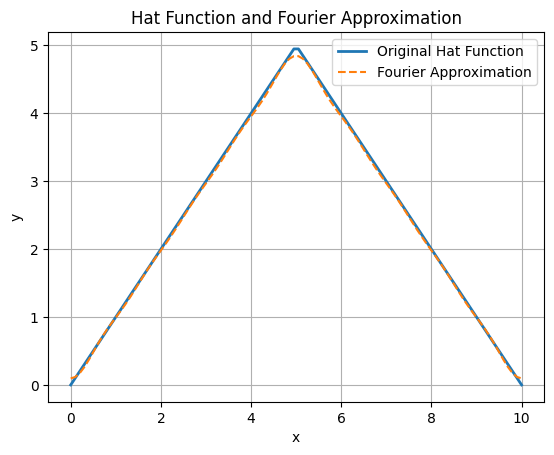

In [212]:
# Plot the original hat function and its Fourier approximation
y_fourier = A_0 / 2 + sum(A[k - 1] * np.cos(2 * np.pi * k * x / L) + B[k - 1] * np.sin(2 * np.pi * k * x / L) for k in range(1, N + 1))

plt.plot(x, y, label="Original Hat Function", linewidth=2)
plt.plot(x, y_fourier, label="Fourier Approximation", linestyle="--")
plt.title("Hat Function and Fourier Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## Euler's Rule


\begin{array}{l}

\textbf{Generalized Fourier Concepts and Complex Numbers:} \\\\

\textbf{Representation of Complex Numbers:} \\\\
\text{Any complex number \( z \) can be represented in polar form as:} \\\\
z = R e^{i\theta}, \quad \text{where \( R \) is the magnitude, and \( \theta \) is the angle (argument).} \\\\
\text{For two complex numbers \( z_1 = R_1 e^{i\theta_1} \) and \( z_2 = R_2 e^{i\theta_2} \):} \\\\
\text{Multiplication: } z_1 z_2 = R_1 R_2 e^{i(\theta_1 + \theta_2)}, \quad
\text{Division: } \frac{z_1}{z_2} = \frac{R_1}{R_2} e^{i(\theta_1 - \theta_2)}. \\\\

\textbf{Taylor Series of \( e^x \):} \\\\
e^x = \sum_{k=0}^\infty \frac{x^k}{k!}, \quad \text{where \( x \in \mathbb{C} \)}. \\\\
\text{For \( e^{ix} \):} \\\\
e^{ix} = \sum_{k=0}^\infty \frac{(ix)^k}{k!} = 1 + ix - \frac{x^2}{2!} - i\frac{x^3}{3!} + \frac{x^4}{4!} + \dots \\\\
\text{Grouping terms into real and imaginary parts:} \\\\
e^{ix} = \left( 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \dots \right) + i \left( x - \frac{x^3}{3!} + \frac{x^5}{5!} - \dots \right). \\\\
\text{The real part corresponds to \( \cos(x) \), and the imaginary part to \( \sin(x) \):} \\\\
e^{ix} = \cos(x) + i \sin(x).

\end{array}




\begin{array}{l}

\textbf{Fourier Series for \([0, L]\):} \\\\

\text{For a general interval } [0, L], \text{ the Fourier series for a function \( f(x) \) is defined as:} \\\\
f(x) \approx \frac{A_0}{2} + \sum_{k=1}^\infty \left( A_k \cos\left(\frac{2\pi k x}{L}\right) + B_k \sin\left(\frac{2\pi k x}{L}\right) \right). \\\\

\text{The Fourier coefficients are given by:} \\\\
A_0 = \frac{2}{L} \int_0^L f(x) \, dx, \quad
A_k = \frac{2}{L} \int_0^L f(x) \cos\left(\frac{2\pi k x}{L}\right) \, dx, \quad
B_k = \frac{2}{L} \int_0^L f(x) \sin\left(\frac{2\pi k x}{L}\right) \, dx. \\\\

\text{Using Euler's formula, we can rewrite the Fourier series as:} \\\\
f(x) \approx \sum_{k=-\infty}^\infty C_k e^{i \frac{2\pi k x}{L}}, \quad C_k = \frac{1}{L} \int_0^L f(x) e^{-i \frac{2\pi k x}{L}} \, dx.

\end{array}




\begin{array}{l}

\textbf{Trigonometric Identities Using \( e^{ix} \):} \\\\

\text{From Euler's formula \( e^{ix} = \cos(x) + i \sin(x) \), we can derive:} \\\\
\cos(x) = \frac{e^{ix} + e^{-ix}}{2}, \quad \sin(x) = \frac{e^{ix} - e^{-ix}}{2i}. \\\\
\text{For \( e^{i(nx)} \), applying Euler's formula:} \\\\
e^{i(nx)} = \cos(nx) + i\sin(nx). \\\\

\end{array}



\begin{array}{l}

\textbf{Transition to the Discrete Fourier Transform (DFT):} \\\\

\text{The DFT discretizes the Fourier transform by sampling \( f(x) \) at \( N \) equally spaced points:} \\\\
x_j = \frac{j}{N}, \quad j = 0, 1, \dots, N-1. \\\\
\text{The DFT coefficients are computed as:} \\\\
\hat{f}_k = \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{-i \frac{2\pi j k}{N}}, \quad k = 0, 1, \dots, N-1. \\\\
\text{The inverse DFT reconstructs the original function:} \\\\
f_j = \sum_{k=0}^{N-1} \hat{f}_k e^{i \frac{2\pi j k}{N}}.

\end{array}



\begin{array}{l}

\textbf{Matrix Representation of the DFT:} \\\\

\text{The DFT can be represented in matrix form using the \( \mathbf{W}_N \) matrix:} \\\\
\mathbf{W}_{N} = \begin{bmatrix}
1 & 1 & 1 & \dots & 1 \\
1 & W_N & W_N^2 & \dots & W_N^{N-1} \\
1 & W_N^2 & W_N^4 & \dots & W_N^{2(N-1)} \\
\vdots & \vdots & \vdots & & \vdots \\
1 & W_N^{N-1} & W_N^{2(N-1)} & \dots & W_N^{(N-1)(N-1)}
\end{bmatrix}, \quad W_N = e^{-2\pi i / N}. \\\\

\text{The DFT computation is then:} \\\\
\hat{\mathbf{f}} = \mathbf{W}_N \mathbf{f}, \quad \text{and the inverse DFT:} \\\\
\mathbf{f} = \frac{1}{N} \mathbf{W}_N^{-1} \hat{\mathbf{f}}. \\\\
\text{The \( \mathbf{W}_N \) matrix encapsulates the periodic structure of the exponential basis functions, reducing the need for separate cosine and sine matrices.}

\end{array}
